# Financial Analysis
### Install Stockex module if necessary or else continue with the standard imports required

In [1]:
#!pip install stockex
import datetime as dt
from dateutil.relativedelta import relativedelta
from stockex import stockwrapper as sw
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)

### Set the necessary variables

In [16]:
data_ob = sw.YahooData()
symbol_list = ['INFY.NS','RBLBANK.NS','AMTEKAUTO.NS','GMRINFRA.NS']
columns = ['Date', 'Close']
to_date = dt.datetime.today().date()
from_date = to_date - relativedelta(days=0, months=0, years=1)
limit = 364

Load the closing price into a DataFrame for further analysis

In [21]:
symbol_data = pd.DataFrame(index=pd.date_range(start=from_date,end=to_date))
#Iterate over the symbols in the Symbol list
for i,symbol in enumerate(symbol_list):
    data = data_ob.get_historical(symbol, columns, startDate=from_date, endDate=to_date, limit=limit)
    data = pd.read_json(json.dumps(data))
    data.set_index('Date', inplace=True, drop=True)
    symbol_data = symbol_data.join(data["Close"], how='left')
    symbol_data.rename(columns={data.columns[-1]: symbol},
                       inplace=True
                       )
#Drop the records without any data
symbol_data = symbol_data.dropna(how='all')
print(symbol_data.tail())

               INFY.NS  RBLBANK.NS  AMTEKAUTO.NS  GMRINFRA.NS
2016-10-26  1014.20001      353.45         44.15        13.85
2016-10-27  1003.50000      361.15         43.20        13.60
2016-10-28   997.50000      374.65         43.05        13.70
2016-10-31   997.50000      374.65         43.05        13.70
2016-11-01   989.45001      395.80         44.00        13.80


In [22]:
symbol_norm = symbol_data.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
symbol_std = symbol_data / symbol_data.ix[0, :]
symbol_log = symbol_data.apply(np.log10)
symbol_slog = symbol_std.apply(np.log10)

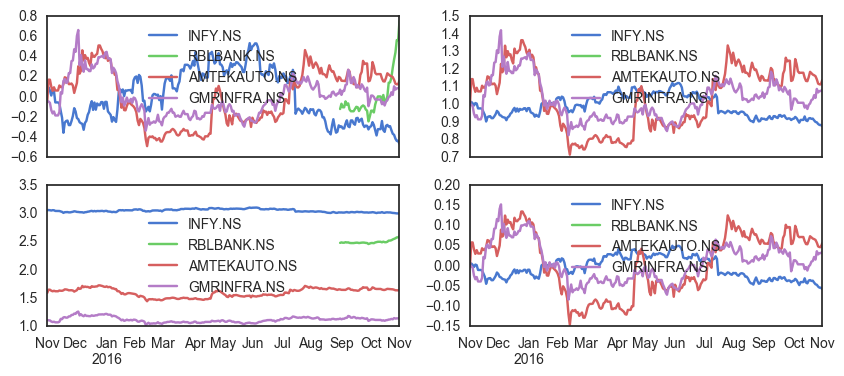

In [23]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4), sharex=True)
symbol_norm.plot(ax= axes[0,0])
symbol_std.plot(ax=axes[0,1])
symbol_log.plot(ax=axes[1,0])
symbol_slog.plot(ax=axes[1,1])

In [24]:
symbol_ret = symbol_data - symbol_data.shift(1)
symbol_normret = symbol_norm - symbol_norm.shift(1)
symbol_logret = symbol_log - symbol_log.shift(1)

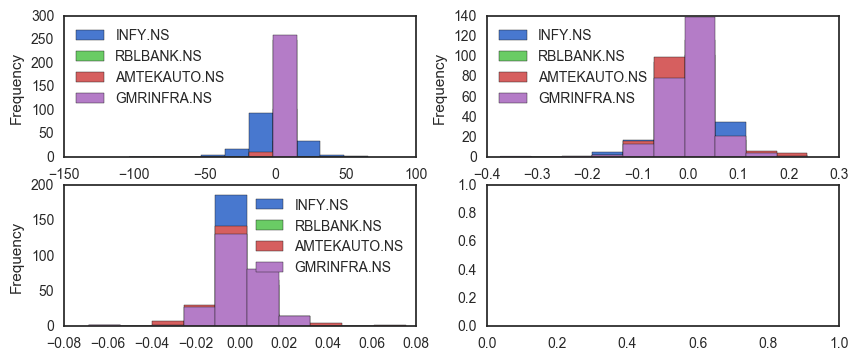

In [25]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
symbol_ret.plot(kind='hist', ax= axes[0,0], bins=10)
symbol_normret.plot(kind='hist', ax= axes[0,1], bins=10)
symbol_logret.plot(kind='hist', ax=axes[1,0])
